# 1. Yield Curve and Its 6 Representations

## Interest Rate

* Interest is the cost of borrowing paid by the borrower to the lender in order to compensate the inconvenience when the lender doesn't have the cash at hand
* Interest is not just about default risk; Even if a borrower has absolutely no chance to default, there will still be a cost for him/her to borrow
* Interest rate is interest divided by notional, usually annualized

## Term Structure

* Borrowing for short term (say 1Y) and long term (say 10Y) usually have different costs

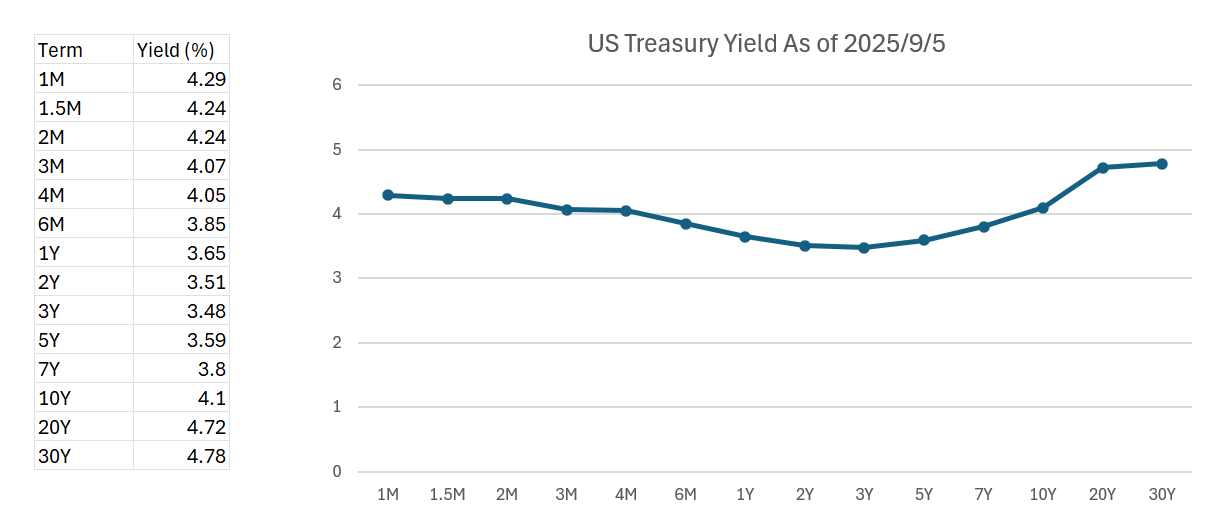

* Data from [treasury.gov](https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_yield_curve&field_tdr_date_value=202509)

## The 6 Representations of Yield Curve

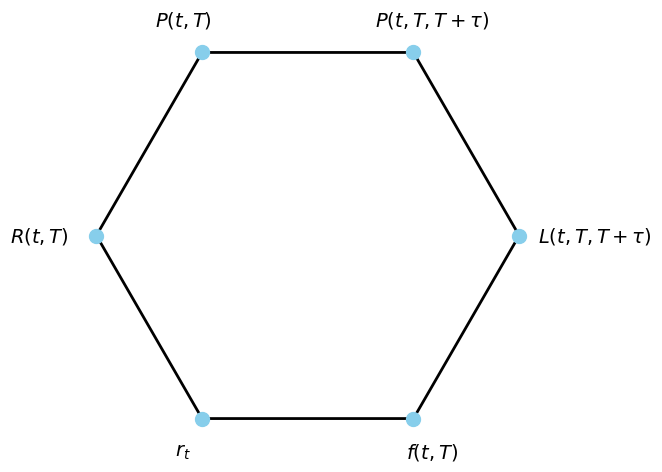

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Hexagon vertices (clockwise, starting from top left)
labels = [
    r"$P(t, T)$",
    r"$R(t, T)$", 
    r"$r_t$", 
    r"$f(t, T)$",
    r"$L(t, T, T+\tau)$",
    r"$P(t, T, T+\tau)$",
    ]

# Calculate hexagon coordinates
angles = np.linspace(np.pi/2 + np.pi/6, np.pi/2 + np.pi/6 + 2*np.pi, 7)  # 6 vertices + close the shape
radius = 1
x = radius * np.cos(angles)
y = radius * np.sin(angles)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x, y, 'k-', lw=2)
ax.scatter(x[:-1], y[:-1], s=100, color='skyblue', zorder=5)

# Annotate each vertex with custom offset for the long label
for i, label in enumerate(labels):
    # Default offset
    dx = 0.18 * np.cos(angles[i])
    dy = 0.18 * np.sin(angles[i])
    # Increase offset for the long label 'L(t, T, T+tau)'
    if label == r"$L(t, T, T+\tau)$":
        dx *= 2
        dy *= 2
    elif label == "$R(t, T)$":
        dx *= 1.5
        dy *= 1.5
    ax.text(x[i]+dx, y[i]+dy, label, fontsize=14, ha='center', va='center')

ax.set_aspect('equal')
ax.axis('off')
# plt.title('Six Yield Curve Notations (Clockwise)', fontsize=16)
plt.show()

## The 6 Representations of Yield Curve (Cont.)


<!-- 
| Notation                  | Definition                    |
|---------------------------|-------------------------------|
| $P(t, T)$                 | Price of a zero-coupon bond that pays $\$1$ and maturity $T$, observed at $t$ |
| $P(t, T, T+\tau)$         | Price of the forward bond that pays $\$1$ for the future period $[T, T+\tau]$, observed at $t$ |
| $L(t, T, T+\tau)$         | Forward (term) rate for the future period $[T, T+\tau]$ observed at $t$ |
| $f(t, T)$                 | Time-$T$ instantaneous forward rate observed at $t$ |
| $r_t$                     | Short rate                    |
| $R(t, T)$                 | Zero rate (spot rate)         |   
-->


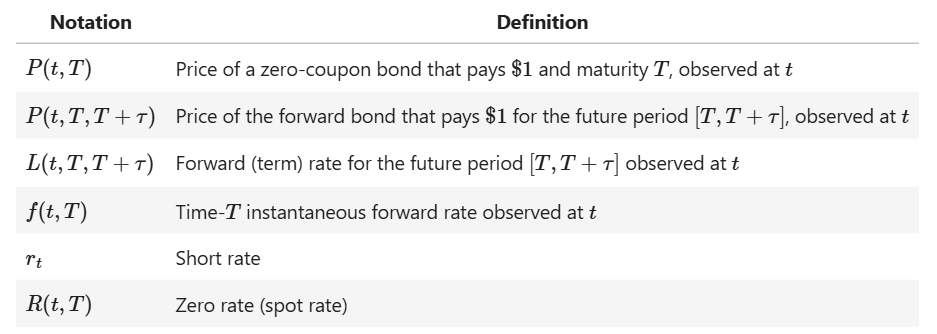

## Zero Rate and Zero-Coupon Bond Price

* Zero rate $R(t, T)$ is defined to be the solution of
$$
P(t, T) = e^{-R(t, T)(T-t)}
$$
* In usual market conditions we have $P(t, T) < 1$, which is equivalent to $R(t, T) > 0$

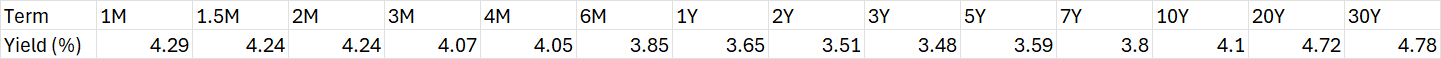

* In the US Treasury example, we have $t =$ 2025/9/5
* For $T-t =$ 10Y, we have $R(t, T) = 4.1\%$
* Zero-coupon bond price is
$$
P(t, T) = e^{-R(t, T)(T-t)} = e^{-0.041\times 10} \approx 0.6637
$$


## Zero-Coupon Bond Price

* Exercise: What is 5Y ZCB price? 

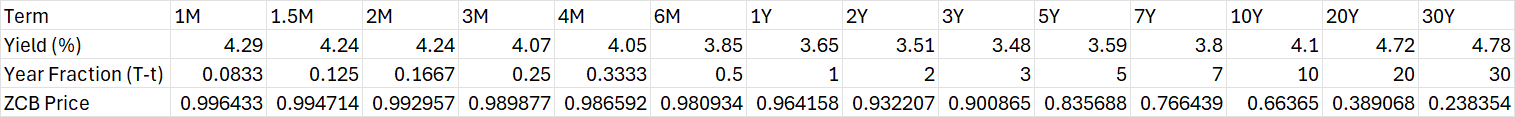

## Zero-Coupon Bond Price as a Discount Factor

* $P(t, T)$ is the time-$t$ price of a ZCB that promises to pay $\$1$ at $T$
* Buying such a ZCB at $t$, you have
    * Cash outflow $P(t, T)$ at $t$
    * Cash inflow $\$1$ at $T$

* You can scale this trade by $\$M$ and get
    * Cash outflow $MP(t, T)$ at $t$
    * Cash inflow $\$M$ at $T$

* Cash flow at $t$ is cash flow at $T$ discounted (recall that $P(t, T) < 1$)
\begin{align*}
&(\text{Cash flow at }t) = (\text{Cash flow at }T)\times P(t, T)\\
&(\text{Cash flow at }T) = (\text{Cash flow at }t)/P(t, T)\\
\end{align*}

* This will be useful in the no arbitrage argument deriving forward bond price
* This is why $P(t, T)$ is sometimes referred to as the discount factor
    * Not to be confused with the discounting process $D_t = e^{-\int_0^t r_s\,ds}$

## Forward Rate and Forward Bond Price

* If, at time $t$, you can foresee you will want to borrow in a future period of time, you can lock in the rate today
* The rate you see today, computed from today's yield curve, is the forward rate $L(t, T, T+\tau)$

## Forward Bond Price

* Say you know you will want to borrow 2Y from now, and return $\$1$ at 3Y from now, so the future period $[T, T+\tau]$ is [2Y, 3Y]
  
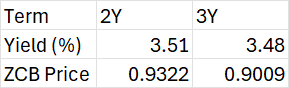

* This is how you can lock in the rate today:
    * Short sell 3Y ZCB that promises to pay $1$ and get cash $0.9009$ (equivalent to borrowing $0.9009$ and returning $1$ in 3Y)
    * Use the cash $0.9009$ to buy 2Y ZCB that promises to pay $0.9009/0.9322 = 0.9664$ (equivalent to lending $0.9009$ out for 2Y and expecting $0.9664$ in return)
* You end up with cash inflow $\$0.9664$ at 2Y and cash outflow $\$1$ at 3Y
* This is called short selling a forward bond for the future period [2Y, 3Y] at $0.9664$, which is the forward bond price $P(t, T, T+\tau)$

## Forward Bond Price: Exercise

* What is the forward bond price for the future period [5Y, 7Y]

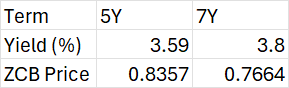

* $0.7664/0.8357 = 0.9171$

## Notations

* $t =$ today
* $T =$ 2Y
* $T+\tau =$ 3Y
* $P(t, T) = 0.9322$
* $P(t, T+\tau) = 0.9009$
* Forward bond price
$$
P(t, T, T+\tau) = \frac{P(t, T+\tau)}{P(t, T)} = 0.9664
$$

## How To Arbitrage if the Quote Is Off

* If, on 9/5/2025, a banker undervalued the [2Y, 3Y] forward bond and quoted you $0.95$, then you should
    1. Short sell one unit of 3Y ZCB and get cash $0.9009$ (equivalent to borrowing $0.9009$ today and returning $1$ in 3Y)
    2. Use the cash $0.9009$ to buy 2Y ZCB paying $0.9009/0.9322 = 0.9664$ (equivalent to lending $0.9009$ out for 2Y and expecting $0.9664$ in return)
    3. Buy the forward bond from the banker at $0.95$
* You end up with
    * Cash inflow $\$0.9664$ at 2Y and cash outflow $\$1$ at 3Y from steps 1 and 2
    * Cash outflow $\$0.95$ at 2Y and cash inflow $\$1$ at 3Y from step 3
    * Sum up to a free cash inflow of $\$0.0164$ at 2Y

* Or equivalently, today's profit
$$
0.0164\times 0.9322 = \$0.01529
$$ 

## No Arbitrage Principle

* In reality you will never see an arbitrage opportunity in the market

## How To Arbitrage if the Quote Is Off: Exercise

* Exercise: If a banker overvalued the [2Y, 3Y] forward bond and quoted you $0.97$, what should you do? And how much profit can you make today?

1. Buy one unit of 3Y ZCB, paying $0.9009$ (equivalent to lending $0.9009$ and have $1$ returned in 3Y)
2. Short sell 2Y ZCB paying $0.9009/0.9322 = 0.9664$ at the end and get cash $0.9009$ (equivalent to borrowing $0.9009$ today and returning $0.9664$ in 2Y)
3. Short sell the forward bond to the banker at $0.97$
* You end up with
    * Cash outflow $\$0.9664$ at 2Y and cash inflow $\$1$ at 3Y from steps 1 and 2
    * Cash inflow $\$0.97$ at 2Y and cash outflow $\$1$ at 3Y from step 3
    * Sum up to a free cash inflow of $\$0.0036$ at 2Y, or equivalently $0.0036\times 0.9322 = \$0.0034$ today

## Forward Rate

* You'd naturally wonder what's the rate of the [2Y, 3Y] forward bond
* The answer is the forward rate $L(t, T, T+\tau)$, defined as the solution of
$$
P(t, T, T+\tau) = \frac{1}{1+\tau L(t, T, T+\tau)}
$$
* Equivalently,
$$
L(t, T, T+\tau) = \frac{1}{\tau}\left(\frac{1}{P(t, T, T+\tau)} - 1\right) = \frac{1}{0.9664} - 1 = 3.477\%
$$

## Forward Rate: Exercise

* What's the forward rate for the future period [5Y, 7Y]?

$$
L(t, T, T+\tau) = \frac{1}{\tau}\left(\frac{1}{P(t, T, T+\tau)} - 1\right) = \frac{1}{2}\left(\frac{1}{0.9171} - 1\right) = 4.52\%
$$

## Application of Forward Rate

* One application of the forward rate is to compare the cost of borrowing
* You know the [2Y, 3Y] forward bond has fair price $0.9664$ and the [5Y, 7Y] forward bond has fair price $0.9171$, but you can't compare the prices as one bond is 1Y long and the other is 2Y. This is not apple to apple comparison
* After omputing the forward rates, you know the [2Y, 3Y] forward bond is cheaper

## Alternative to Forward Bond

* Today you foresee you will want to borrow for the future period [2Y, 3Y]
* You can either
    * Short sell a forward bond
    * Do nothing and wait 2Y, and borrow then (short selling a 1Y bond then)
* Which one is better?

* Don't know, as the interest rate in 2Y is not predictable 

## More Alternatives

* Do nothing today, and short sell a forward bond for the future period [2Y-1D, 3Y-1D] tomorrow
* Do nothing today and tomorrow, and short sell a forward bond for the future period [2Y-2D, 3Y-2D] the day after
* Do nothing today, tomorrow and the day after, and short sell a forward bond for the future period [2Y-3D, 3Y-3D] 3 days from now
* ...

## Forward Rate Agreements

* When a future period of time $[T, T+\tau]$ is specified, so far we have learned:
    * The forward bond price is uniquely determined from today's zero curve assuming no arbitrage
    * A forward bond price has a corresponding forward rate; Given one it's easy to compute the other

* Given $[T, T+\tau]$, banks do not quote forward bond price, only the forward rate
* This is called a forward rate agreement (FRA), an over-the-counter (OTC) product
* Call a banker and say "I want to borrow $\$M$ at $T$ and return at $T+\tau$, what's the interest rate you will charge?"
* Say you call 10 different banks, and get 10 quotes. They should all be very close, or otherwise there is an arbitrage

* FRA is not only a traded product in the real world, but also a building block for many more complicated rates products, conceptually important for interest rate derivatives pricing

## Instantaneous Forward Rate

* Taking $\tau\downarrow 0$, the forward rate $L(t, T, T+\tau)$ becomes the instantaneous forward rate $f(t, T)$
* Forward rate $L(t, T, T+\tau)$ is the rate you see at $t$ for the future period $[T, T+\tau]$
* Instantaneous forward rate $f(t, T)$ is the rate you see at $t$ for the future instant $[T, T+\epsilon]$
* No one ever quotes instantaneous forward rates, but it is the fundamental of many interest rate models 

## Instantaneous Forward Rate From ZCB Price

$$
$$

\begin{align*}
f(t, T) &= \lim_{\tau \downarrow 0} L(t, T, T+\tau) \\
&= \lim_{\tau \downarrow 0} \frac{1}{\tau}\left(\frac{1}{P(t, T, T+\tau)} - 1\right) \\
&= \lim_{\tau \downarrow 0} \frac{1}{\tau}\left(\frac{P(t, T)}{P(t, T+\tau)} - 1\right) \\
&= \lim_{\tau \downarrow 0} \frac{1}{\tau}\left(\frac{P(t, T) - P(t, T+\tau)}{P(t, T+\tau)}\right) \\
&= \lim_{\tau \downarrow 0} \left(-\frac{1}{P(t, T+\tau)}\right)\left(\frac{P(t, T+\tau) - P(t, T)}{\tau}\right) \\
&= -\frac{1}{P(t, T)}\frac{\partial }{\partial T} P(t, T)\\
&= -\frac{\partial }{\partial T} \log P(t, T)\\
\end{align*}

## Instantaneous Forward Rate From Zero Rate

$$
$$
Note that
\begin{align*}
f(t, T) &= -\frac{\partial }{\partial T} \log P(t, T) = \frac{\partial }{\partial T} [(T-t)R(t, T)]. 
\end{align*}
Plug in $t=0$ to obtain
\begin{align*}
f(0, T) = \frac{d }{d T} [TR(0, T)]. 
\end{align*}
The quantity $TR(0, T)$ is called the time weighted zero rate. This identity means today's instantaneous forward curve is today's time weighted zero curve taking derivative. This is a useful fact in curve construction. 

## ZCB Price From Instantaneous Forward Rate 

$$
$$

Recall that
\begin{align*}
f(t, T) = -\frac{\partial }{\partial T} \log P(t, T). 
\end{align*}
So 
\begin{align*}
\log P(t, T) = -\int_c^T f(t, u)\,du
\end{align*}
for some constant $c$, but when $T=t$ we must have 
\begin{align*}
0 = \log P(t, t) = -\int_c^t f(t, u)\,du. 
\end{align*}
Thus we have $c=t$ and hence
\begin{align*}
P(t, T) = e^{-\int_t^T f(t, u)\,du}. 
\end{align*}

## Zero Rate From Instantaneous Forward Rate

$$
$$

Recall that
\begin{align*}
e^{-(T-t)R(t, T)} = P(t, T) = e^{-\int_t^T f(t, u)\,du}. 
\end{align*}
Thus 
\begin{align*}
R(t, T) = \frac{1}{T-t}\int_t^T f(t, u)\,du. 
\end{align*}
We could have obtained the same formula by integrating 
\begin{align*}
f(t, T) = \frac{\partial }{\partial T} [(T-t)R(t, T)]
\end{align*}
which we just derived. 

## Forward Bond Price From Instantaneous Forward Rate 

$$
$$

Recall that
\begin{align*}
P(t, T) = e^{-\int_t^T f(t, u)\,du}. 
\end{align*}
Thus 
\begin{align*}
P(t, T, T+\tau) = \frac{P(t, T+\tau)}{P(t, T)} = e^{-\int_T^{T+\tau} f(t, u)\,du}. 
\end{align*}

## Forward Term Rate From Instantaneous Forward Rate 

$$
$$

Since
\begin{align*}
P(t, T, T+\tau) = e^{-\int_T^{T+\tau} f(t, u)\,du}, 
\end{align*}
we have 
\begin{align*}
L(t, T, T+\tau) &= \frac{1}{\tau}\left(\frac{1}{P(t, T, T+\tau)} - 1\right) \\
&= \frac{1}{\tau}\left(e^{\int_T^{T+\tau} f(t, u)\,du} - 1\right). 
\end{align*}

## ZCB Price and Zero Rate

$$
$$

By definition we have 
$$
P(t, T) = e^{-R(t, T)(T-t)}. 
$$
We can isolate $R(t, T)$ to get
$$
R(t, T) = -\frac{1}{T-t}\log P(t, T). 
$$

## Forward Bond Price and Forward Rate

$$
$$

By definition we have 
$$
P(t, T, T+\tau) = \frac{1}{1+\tau L(t, T, T+\tau)}. 
$$
We can isolate $L(t, T, T+\tau)$ to get
$$
L(t, T, T+\tau) = \frac{1}{\tau}\left(\frac{1}{P(t, T, T+\tau)} - 1\right). 
$$

## Appendix -- Simple and Continuous Compounding

## Simple Compounding

* Assuming flat yield curve with annualized interest rate $r=2\%$
* Certificate of Deposit (CD) with 1Y maturity: Save $1$ dollar (principal) in a bank for one year
$$
1+r = 1.02
$$
* CD with 6M maturity: What if you put the money in the bank only for half a year?
$$
1+\frac{r}{2} = 1.01
$$

* Rolling 6M CD: What if you roll the principal and earned interest from the current 6M CD into a new one?
$$
\left(1+\frac{r}{2}\right)^2 = 1.0201 > 1+r
$$

## Simple Compounding (Cont.)

* What if you put the money in the bank only for 1/3 year?
    * CD with 4M maturity
$$
1+\frac{r}{3} \approx 1.00667
$$
* Rolling 4M CD
$$
\left(1+\frac{r}{3}\right)^3 \approx 1.02013363
$$
* This is greater than rolling 6M CD
$$
\left(1+\frac{r}{2}\right)^2 = 1.0201
$$

In [2]:
from pandas import DataFrame

r = 0.02

columns=['Rolling Frequency', 'Terminal Account Value']

DataFrame([(n, (1 + r/n)**n) for n in range(1, 11)], 
          columns=columns).set_index('Rolling Frequency')

,Terminal Account Value
Rolling Frequency,
1,1.020000
2,1.020100
3,1.020134
4,1.020151
5,1.020161
6,1.020167
7,1.020172
8,1.020176
9,1.020179


## From Simple to Continuous

* The more frequently you roll the CDs in a year, the higher the terminal account value will be
* When rolling frequency goes to infinity, will the terminal account value goes to infinity? 

* No
$$
\lim_{n\rightarrow\infty}\left(1+\frac{r}{n}\right)^n = e^r
$$


## Continuous Compounding

* Repeatedly rolling 6M CDs for $T=5$ years, the terminal value is
$$
\left(1+\frac{r}{2}\right)^{2\times 5}
$$
* Take the rolling frequency to infinity:
$$
\lim_{n\rightarrow\infty}\left(1+\frac{r}{n}\right)^{nT} = e^{rT}
$$ 
* This is why zero rate $R(t, T)$ is defined as the solution of $P(t, T) = e^{-R(t, T)(T-t)}$